# 2. Machine learning for regression

This chapter covers

* Creating a car-price prediction project with a linear regression model
* Doing an initial exploratory data analysis with Jupyter notebooks
* Setting up a validation framework
* Implementing the linear regression model from scratch
* Performing simple feature engineering for the model
* Keeping the model under control with regularization
* Using the model to predict car prices

In chapter 1, we talked about supervised machine learning, in which we teach machine
learning models how to identify patterns in data by giving them examples.


Suppose that we have a dataset with descriptions of cars, like make, model, and age, and
we would like to use machine learning to predict their prices. These characteristics of cars are
called features, and the price is the target variable - something we want to predict. Then the
model gets the features and combines them to output the price.


This is an example of supervised learning: we have some information about the price of
some cars, and we can use it to predict the price of others. In chapter 1, we also talked about
different types of supervised learning: regression and classification. When the target variable
is numerical, we have a regression problem, and when the target variable is categorical, we
have a classification problem.


In this chapter, we will create a regression model, and we will start with the simplest one:
linear regression. We will implement the algorithms ourselves, which is simple enough to do in
a few lines of code. At the same time, it’s very illustrative, and it will teach you how to deal
with NumPy arrays and perform basic matrix operations such as matrix multiplication and matrix inversion. We will also come across problems of numerical instability when inverting a
matrix and see how regularization helps solve them. 


## 2.1 Car-price prediction project


The problem we will solve in this chapter is predicting the price of a car.


Suppose that we have a website where people can sell and buy used cars. When posting
an ad on our website, the sellers often struggle to come up with a meaningful price. We want
to help our users with automatic price recommendation. We ask the sellers to specify model,
make, year, mileage, and other important characteristics of a car, and based on that
information, we want to suggest the best price.


One of the product managers in the company accidentally came across an open dataset
with car prices and asked us to have a look at it. We checked the data and saw that it contains
all the important features as well as the recommended price — exactly what we need for our
use case. Thus, we decided to use this dataset for building the price recommendation
algorithm.


The plan for the project is the following:


1. First, we download the dataset.

2. Next, we do some preliminary analysis of the data.

3. After that, we set up a validation strategy to make sure our model produces correct
predictions.

4. Then we implement a linear regression model in Python and NumPy.

5. Next, we cover feature engineering - to extract important features from the data to
improve the model

6. Finally, we see how to make our model stable with regularization and use it to predict
car prices. 

### 2.1.1 Downloading the dataset


The first thing we do for this project is to install all the required libraries: Python, NumPy,
Pandas, and Jupyter notebook. The easiest way to do it is to use a Python distribution called
Anaconda (https://www.anaconda.com). Please refer to appendix A for installation guidelines.


After the libraries are installed, we need to download the dataset. There are multiple
options for doing this. You can download it manually through the kaggle web interface. It’s
available at https://www.kaggle.com/CooperUnion/cardataset.

Go there, open it, and click
the download link. The other option is using the kaggle command-line interface (CLI), which is
a tool for programmatic access to all datasets available via kaggle. For this chapter, we will
use the second option. We describe how to configure the kaggle CLI in appendix A. 


**NOTE: Kaggle is an online community for people who are interested in machine learning. It is mostly known
for hosting machine learning competitions, but it is also a data sharing platform where anyone can share a
dataset. More than 16,000 datasets are available for anyone to use. It is a great source of project ideas and
very useful for machine learning projects.**

In this chapter as well as throughout the book, we will actively use NumPy. We cover all
necessary NumPy operations as we go along, but please refer to appendix C for a more indepth introduction.


The source code for this project is available in the book’s repository in github at
https://github.com/alexeygrigorev/mlbookcamp-code in chapter-02-car-price.


As the first step, we will create a folder for this project. We can give it any name, such as
chapter-02-car-price:

Then we download the dataset:

This command downloads the cardataset.zip file, which is a zip archive. Let’s unpack it:

Inside, there’s one file: data.csv.

When we have the dataset, let’s do the next step: understanding it. 

## 2.2 Exploratory data analysis


Understanding data is an important step in the machine learning process. Before we can train
any model, we need to know what kind of data we have and whether it is useful. We do this
with exploratory data analysis (EDA).


We look at the dataset to learn:

* The distribution of the target variable
* The features in this dataset
* The distribution of values in these features
* The quality of the data
* The number of missing values

### 2.2.1 Exploratory data analysis toolbox


The main tools for this analysis are Jupyter notebook, Matplotlib and Pandas:
    
* Jupyter notebook is a tool for interactive execution of Python code. It allows to execute
a piece of code and immediately see the outcome. In addition to that we can display
charts and add notes with comments in free text. It also supports other languages such
as R or Julia (hence the name: Jupyter stands for Julia, Python, R), but we will only use
it for Python.

* Matplotlib is a library for plotting. It is very powerful and allows you to create different
types of visualizations, such as line chars, bar charts, histograms and many more.

* Pandas is a library for working with tabular data. It can read data from any source, be
it a csv file, a json file or a database.
We will also use Seaborn, another tool for plotting that is built on top of Matplotlib and makes
it easier to draw charts.
Let’s start a Jupyter notebook by executing the following command:



**This command starts a Jupyter notebook server in the current directory and opens it in the
default web browser (figure 2.1).**

If Jupyter is running on a remote server, it requires additional configuration. Please refer to
appendix A for details on the setup.


Now let’s create a notebook for this project. Click New, then select Python 3 in the
Notebooks section. We can call it chapter-02-car-price-project - click the current title
(Untitled), and replace it with the new one.


First, we need to import all the libraries required for this project. Write the following in the
first cell: 

In [1]:
# Import NumPy: a library for numerical operations
import pandas as pd # A

#  Import Pandas: a library for tabular data
import numpy as np #B

# Import plotting libraries: matplotlib and seaborn
import seaborn as sns # C
from matplotlib import pyplot as plt # C

# Make sure that plots are rendered correctly in jupyter notebooks. 
# D
%matplotlib inline

The first two lines, A and B, are imports for required libraries: NumPy for numeric operations
and Pandas for tabular data. The convention is to import these libraries using shorter aliases
(such as pd in import pandas as pd). This convention is very common in the Python machine
learning community, and everybody follows it.


The next two lines, C, are imports for plotting libraries. The first one, matplotlib, is a
library for creating good-quality visualizations. It’s not always easy to use this library as is.
Some libraries make using Matplotlib simpler, and Seaborn is one of them.


Finally, %matplotlib inline in D tells Jupyter to expect plots in the notebook, so it will be
able to render them when we need them.


Press Shift+Enter or click Run to execute the content of the selected cell.
We will not get into more detail about Jupyter notebooks. Check the official website2 to
learn more about it. The site has plenty of documentation and examples that will help you
master it.


### 2.2.2 Reading and preparing data


Now let’s read our dataset. We can use the read_csv function from Pandas for that purpose.
Put the following code in the next cell and again press Shift+Enter: 

In [2]:
df = pd.read_csv('dataset/data.csv')

This line of code reads the csv file and writes the results to a variable named df, which is
short for dataframe. Now we can check how many rows are there. Let’s use the len function: 

In [3]:
len(df) 

11914

The function prints 11914, which means that there are almost 12,000 cars in this dataset
(figure 2.2). 

**Figure 2.2. Jupyter notebooks are interactive. We can type some code in a cell, execute it, and see the results
immediately, which is ideal for exploratory data analysis**

In [4]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


**Figure 2.3 The output of the head() function of a Pandas dataframe: it shows the first five rows of the dataset.
This output allows us to understand what the data looks like.**

This gives us an idea of what the data looks like. We can already see that there are some
inconsistencies in this dataset: the column names sometimes have spaces and sometimes
have underscores (_). The same is true for feature values: sometimes they’re capitalized and
sometimes they are short strings with spaces. This is inconvenient and confusing, but we can
solve this by normalizing them: replace all spaces with underscores and lowercase all letters:


In [5]:
#  Lowercase all the column names, and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ','_') # A

# Select only columns with string values. 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B

# Lowercase and replace spaces with underscores for values in all string columns of the dataframe. 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_') # C

In A and C, we use the special str attribute. Using it, we can apply string operations to the
entire column at that same time without writing any for loops. We use it to lowercase the
column names and the content of these columns as well as to replace spaces with
underscores.
We can use this attribute only for columns with string values inside. This is exactly why we
first select such columns in B.

**NOTE: In this chapter and subsequent chapters, we cover relevant Pandas operations as we go along, but at
a fairly high level. Please refer to appendix D for a more consistent and in-depth introduction to Pandas.**

After this initial preprocessing, the dataframe looks more uniform (figure 2.4). 

In [6]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


**Figure 2.4: The result of preprocessing the data. The column names and values are normalized: they are
lowercased, and the spaces are converted to underscores.**

As we see, this dataset contains multiple columns:
* make — make of a car (BMW, Toyota, and so on)
* model — model of a car
* year — year when the car was manufactured
* engine_fuel_type — type of fuel the engine needs (diesel, electric, and so on)
* engine_hp — horsepower of the engine
* engine_cylinders — number of cylinders in the engine
* transmission_type — type of transmission (automatic or manual)
* driven_wheels — front, rear, all
* number_of_doors — number of doors a car has
* market_category — luxury, crossover, and so on
* vehicle_size — compact, midsize, or large
* vehicle_style — sedan or convertible 
* highway_mpg — miles per gallon (mpg) on the highway
* city_mpg — miles per gallon in the city
* popularity — number of times the car was mentioned in a Twitter stream
* msrp — manufacturer’s suggested retail price

For us, the most interesting column here is the last one: MSRP (manufacturer’s suggested
retail price, or simply the price of a car). We will use this column for predicting the prices of a
car.


### 2.2.3 Target variable analysis


The MSRP column contain the important information — it’s our target variable, the y, which is
the value that we want to learn to predict.


One of the first steps of exploratory data analysis should always be to look at what the
values of y look like. We typically do this by checking the distribution of y: a visual description
of what the possible values of y can be and how often they occur. This type of visualization is
called a histogram.


We will use Seaborn to plot the histogram, so type the following in the Jupyter notebook: 

C:\Users\bizof\Anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='msrp'>

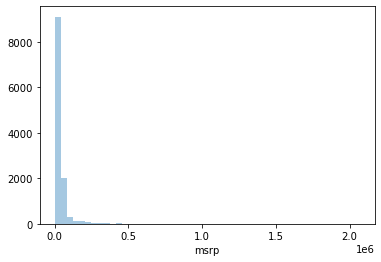

In [7]:
sns.distplot(df.msrp, kde=False) 
# sns.displot(df.msrp, kde=False) 
# sns.histplot(df.msrp, kde=False)

After plotting this graph, we immediately notice that the distribution of prices has a very long
tail. There are many cars with low prices on the left side, but the number quickly drops, and
there’s a long tail of very few cars with high prices (see figure 2.5). 

**Figure 2.5 The distribution of the prices in the dataset. We see many values at the low end of the price axis and
almost nothing at the high end. This is a long tail distribution, which is a typical situation for prices. There are
many items with low prices and very few expensive ones.**

We can have a closer look by zooming in a bit and looking at values below $100,000 (figure
2.6): 

<AxesSubplot:xlabel='msrp'>

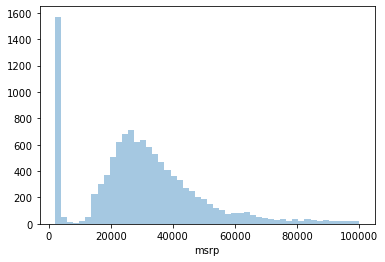

In [8]:
sns.distplot(df.msrp[df.msrp < 100000], kde=False)
# sns.displot(df.msrp[df.msrp < 100000], kde=False)
# sns.histplot(df.msrp[df.msrp < 100000], kde=False)


**Figure 2.6. The distribution of the prices for cars below $100,000. Looking only at car prices below $100,000
allows us to see the head of the distribution better. We also notice a lot of cars that cost $1,000.**

The long tail makes it quite difficult for us to see the distribution, but it has an even stronger
effect on a model: such distribution can greatly confuse the model, so it won’t learn well
enough. One way to solve this problem is log transformation. If we apply the log function to
the prices, it removes the undesired effect (figure 2.7). 

**Figure 2.7 The logarithm of the price. The effect of the long tail is removed, and we can see the entire
distribution in one plot.**


The +1 part is important in cases that have zeros. The logarithm of zero is minus infinity, but
the logarithm of one is zero. If our values are all non-negative, by adding 1, we make sure
that the transformed values do not go below zero.


For our specific case, zero values are not an issue. All the prices we have start at $1,000;
but it’s still a convention that we follow. NumPy has a function that performs this
transformation:

In [9]:
log_price = np.log1p(df.msrp) 

To look at the distribution of the prices after the transformation, we can use the same distplot
function (figure 2.7):

<AxesSubplot:xlabel='msrp'>

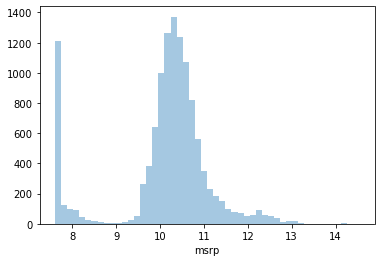

In [10]:
sns.distplot(log_price, kde=False) 
# sns.displot(log_price, kde=False) 
# sns.histplot(log_price, kde=False) 

As we see, this transformation removes the long tail, and now the distribution resembles a
bell-shaped curve. This distribution is not normal, of course, because of the large peak in
lower prices, but the model can deal with it more easily. 

**NOTE Generally, it’s good when the target distribution looks like the normal distribution (figure 2.8). Under
this condition, models such as linear regression perform well.**

**Figure 2.8: The normal distribution, also known as Gaussian, follows the bell-shaped curve, which is symmetric
and has a peak in the center.**

#### Exercise 2.1


The head of a distribution is a range where there are many values. What is a long tail of a
distribution?


a) A big peak around 1000 USD

b) A case when many values are spread very far from the head — and these values
visually appear as a “tail” on the histogram

c) A lot of very similar values packed together within a short range

### 2.2.4 Checking for missing values


We will look more closely at other features a bit later, but one thing we should do now is check
for missing values in the data. This step is important because typically, machine learning
models cannot deal with missing values automatically. We need to know whether we need to
do anything special to handle those values.


Pandas has is a convenient function that checks for missing values: 

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

The first thing we see is that MSRP — our target variable — doesn’t have any missing values.
This result is good because otherwise, such records won’t be useful to us: we always need to
know the target value of an observation to use it for training the model. Also, a few columns
have missing values, especially market_category, in which we have almost 4,000 rows with
missing values.


We will need to deal with missing values later, when we train the model, so we should
keep this problem in mind. For now, we won’t do anything else with these features and will
proceed to the next step: setting up the validation framework so that we can train and test
machine learning models.


### 2.2.5 Validation framework


As we learned previously, it’s important to set up the validation framework as early as possible
to make sure that the models we train are good and can generalize. That is, that the model
can be applied to new unseen data. To do that, we put aside some data and train the model
only on one part. Then we use the held-out dataset — the one we didn’t use for training — to
make sure that the predictions of the model make sense.


It’s important because we train the model by using optimization methods that fit the
function g(X) to the data X. Sometimes these optimization methods pick up spurious patterns
— patterns that appear to be real patterns to the model but in reality are random fluctuations.
If we have a small training dataset in which all BMW cars cost only $10,000, for example, the
model will think that this is true for all BMW cars in the world.


To ensure that this doesn’t happen, we use validation. Because the validation dataset is
not used for training the model, the optimization method did not see this data. So when we
apply the model to this data, it emulates the case of applying the model to new data that we
never saw. If the validation dataset has BMW cars with prices higher than $10,000, but our model will predict 10,000 on them, we will notice that the model doesn’t perform well on
these examples.


As we already know, we need to split the dataset into three parts: train, validation, and
test (figure 2.9).

**Figure 2.9 The entire dataset is split into three parts: train, validation and test.**

Let’s split the dataframe such that:
* 20% of data goes to validation,
* 20% goes to test, and
* the remaining 60% goes to train.

In [12]:
# Get the number of rows in the dataframe. 
n = len(df) # A

#Calculate how many rows should go to train, validation, and test. 
n_val = int(0.2 * n) # B
n_test = int(0.2 * n) # B
n_train = n - (n_val + n_test) # B

#  Fix the random seed to make sure that the results are reproducible. 
np.random.seed(2) # C

# Create a NumPy array with indices from 0 to (n-1) and shuffle it.
idx = np.arange(n) # D
np.random.shuffle(idx) # D

#  Use the array with indices to get a shuffled dataframe. 
df_shuffled = df.iloc[idx] # E

# Split the shuffled dataframe into train, validation, and test. 
df_train = df_shuffled.iloc[:n_train].copy() # F
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() # F
df_test = df_shuffled.iloc[n_train+n_val:].copy() # F

Let’s take a closer look at this code and clarify a few things.


In D, we create an array and then shuffle it. Let’s see what happens there. We can take a
smaller array of five elements and shuffle it:

If we run it, it prints something similar to 

If we run it again, however, the results will be different:

To make sure that every time we run it, the results are the same, in C we fix the random
seed: 


The function np.random.seed takes in any number and use this number as the starting seed
for all the generated data inside NumPy’s random package.

When we execute this code, it prints the following:

In this case the results are still random, but when we re-execute it, the result turns out to be
the same as previously: 

This is good for reproducibility. If we want somebody else to run this code and get the same
results, we need to make sure that everything is fixed, even the “random” component of our
code.


After we create an array with indices idx, we can use it to get a shuffled version of our
initial dataframe. For that purpose in E, we use iloc, which is a way to access the rows of the
dataframe by their numbers: 


If idx contains shuffled consequent numbers, this code will produce a shuffled dataframe
(figure 2.10).

**Figure 2.10 Using iloc to shuffle a dataframe. When used with a shuffled array of indices, it creates a shuffled
dataframe.**

In this example, we used iloc with a list of indices. We can also use ranges with the colon
operator (:), and this is exactly what we do in F for splitting the shuffled dataframe into train,
validation, and test: 

Now the dataframe is split into three parts, and we can continue. Our initial analysis showed a
long tail in the distribution of prices, and to remove its effect, we need to apply the log
transformation. We can do that for each dataframe separately: 

In [13]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values) 


To avoid accidentally using the target variable later, let’s remove it from the dataframes:

In [14]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

**NOTE: Removing the target variable is an optional step. But it’s helpful to make sure that we don’t use it
when training a model: if it happens, we’d use price for predicting the price, and our model would have the
perfect accuracy.**

When the validation split is done, we can do the next step: training a model.
    
    
## 2.3 Machine learning for regression


After performing the initial data analysis, we are ready to train a model. The problem we are
solving is a regression problem: the goal is to predict a number — the price of a car. For this
project we will use the simplest regression model: linear regression.
    
    
### 2.3.1 Linear regression


To predict the price of a car we need to use a machine learning model. To do this, we will use
linear regression, which we will implement ourselves. Typically, we don’t do this by hand;
instead, we let a framework do this for us. In this chapter, however, we want to show that
there is no magic inside these frameworks: it’s just code. Linear regression is a perfect model
because it’s relatively simple and can be implemented with just a few lines of NumPy code.


First, let’s understand how linear regression works. As we know from chapter 1, a
supervised machine learning model has the form 

This is a matrix form. X is a matrix where the features of observations are rows of the matrix
and y is a vector with the values we want to predict.


These matrices and vectors may sound confusing, so let’s take a step back and consider
what happens with a single observation xi and the value yi that we want to predict. The index i
here means that this is an observation number i, one of m observations that we have in our
training dataset.


Then, for this single observation, the formula above looks like

If we have n features, our vector xi is n-dimensional, so it has n components:

Because it has n components, we can write the function g as a function with n parameters,
which is the same as the previous formula: 

For our case, we have 7,150 cars in the training dataset. This means that m = 7150, and i can
be any number between 0 and 7,149. For i = 10, for example, we have the following car:

In [15]:
df_shuffled.iloc[10] # full record

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                    453
engine_cylinders                              12
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                                2
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
msrp                                      479775
Name: 7557, dtype: object

In [16]:
y_train[10] # logirithmic price

13.08107460729463

In [17]:
np.exp(y_train[10]) # price

479776.00000000006

In [18]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                    453
engine_cylinders                              12
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                                2
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

Let’s pick a few numerical features and ignore the rest for now. We can start with horsepower,
mpg in the city, and popularity: 

In [19]:
df_train.iloc[10][['engine_hp','city_mpg','popularity']]

engine_hp     453
city_mpg       11
popularity     86
Name: 7557, dtype: object

Then let’s assign these features to xi1, xi2, and xi3, respectively. This way, we get the feature
vector xi with 3 components: 

To make it easier to understand, we can translate this mathematical notation to Python. In our
case, the function g has the following signature:

In this code, the variable xi is our vector 𝑥𝑖. Depending on implementation, xi could be a list
with n elements or a NumPy array of size n.


For the car above, xi is a list with three elements: 

When we apply the function g to a vector xi, it produces y_pred as the output, which is the
g’s prediction for xi: 

We expect this prediction to be as close as possible to yi, which is the real price of the car.


**NOTE: In this section, we will use Python to illustrate the ideas behind mathematical formulas. We don’t
need to use these code snippets for doing the project. On the other hand, taking this code, putting it into
Jupyter, and trying to run it could be helpful for understanding the concepts.**


There are many ways the function g could look, and the choice of a machine learning
algorithm defines the way it works.


If g is the linear regression model, it has the following form: 



The variables w0, w1, w2, …, wn are the parameters of the model:

* w0 is the bias term.
* w1, w2, …, wn are the weights for each feature xi1, xi2, …, xin.

These parameters define exactly how the model should combine the features so that the
predictions at the end are as good as possible. It’s okay if the meaning behind these
parameters is not clear yet, since we will cover them later in this section.

To keep the formula shorter, let’s use sum notation: 

#### Exercise 2.2

For supervised learning, a machine learning model for a single observation yi ≈ g(xi). What
are xi and yi for this project?

**a) xi is a feature vector - a vector that contains a few numbers that describe the
object (a car), and yi is the logarithm of the price of this car**

b) yi is a feature vector - a vector that contains a few numbers that describe the
object (a car), and xi is the logarithm of the price of this car

In [20]:
xi1 = df_train.iloc[10][['engine_hp','city_mpg','popularity']][0]
xi2 = df_train.iloc[10][['engine_hp','city_mpg','popularity']][1]
xi3 = df_train.iloc[10][['engine_hp','city_mpg','popularity']][2]
xi = [xi1,xi2,xi3]
xi

[453.0, 11, 86]

In [21]:
yi = y_train[10]
yi

13.08107460729463

These weights are what the model learns when we train it. We can have a model with the
following weights, for example (table 2.1).


**Table 2.1 An example of weights that a linear regression model learned**

So if we want to translate this model to Python, this is how it will look:

In [22]:
w0 = 7.17
w = [0.01, 0.04, 0.002] # [w1 w2 w3 ]
n = 3
def linear_regression(xi):
    result = w0
    for j in range(n):
        result = result + xi[j] * w[j]
#         print(xi[j])
    return result 

We put all the feature weights inside a single list w — just like we did with xi previously. All
we need to do now is loop over these weights and multiply them by the corresponding feature
values. This is nothing else, but the direct translation of the formula above to Python.
This is easy to see. Have another look at the formula: 

Our example has three features, so n = 3, and we have

This is exactly what we have in the code: 

In [23]:
# manual
result = w0 + xi[0] * w[0] + xi[1] * w[1] + xi[2] * w[2]
result

12.312

With the simple exception that indexing in Python starts with 0, xi1 becomes xi[0] and w1 is
w[0].

Now let’s see what happens when we apply the model to our observation xi and replace the
weights with their values: 

The prediction we get for this observation is 12.31. Remember that during preprocessing, we
applied the logarithmic transformation to our target variable y. This is why the model we
trained on this data also predicts the logarithm of the price. To undo the transformation, we
need to take the exponent of the logarithm. In our case, when we do it, the prediction
becomes 220,000.


The bias term (7.17) is the value we would predict if we didn’t know anything about the
car; it serves as a baseline.


We do know something about the car, however: horsepower, mpg in the city, and
popularity. These features are the xi1, xi2, and xi3 features, each of which tells us something
about the car. We use this information to adjust the baseline.


Let’s consider the first feature: horsepower. The weight for this feature is 0.01, which
means that for each extra unit of horsepower, we adjust the baseline by adding 0.01. Because
we have 453 horses in the engine, we add 4.53 to the baseline: 453 horses ⋅ 0.01 = 4.53.
The same happens with mpg. Each additional mpg increases the price by 0.04, so we add
0.44: 11 mpg ⋅ 0.04 = 0.44.


Finally, we take popularity into account. In our example, each mention in the Twitter
stream results in a 0.002 increase. In total, popularity contributes 0.172 to the final
prediction.


This is exactly why we get 12.31 when we combine everything (figure 2.11). 

**Figure 2.11 The prediction of linear regression is the baseline of 7.17 (the bias term) adjusted by information we
have from the features. Horsepower contributes 4.53 to the final prediction; mpg, 0.44; and popularity, 0.172.**


Now let’s remember that we are actually dealing with vectors, not individual numbers. We
know that xi is a vector with n components: 

We can also put all the weights together in a single vector w: 

In fact, we already did that in the Python example when we put all the weights in a list, which
was a vector of dimensionality 3 with weights for each individual feature. This is how the
vectors look like for our example: 

Because we now think of both features and weights as vectors xi and w, respectively, we can
replace the sum of the elements of these vectors with a dot product between them: 

The dot product is a way of multiplying two vectors: we multiply corresponding elements of
the vectors and then sum the results. Refer to Appendix C for more details about vectorvector multiplication.


The translation of the formula for dot product to the code is straightforward:

In [24]:
def dot(xi, w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
        print(result)
    return result
dot(xi, w)

4.53
4.970000000000001
5.142


5.142

Using the new notation, we can rewrite the entire equation for linear regression as 

where

* w0 is the bias term.
* w is the n-dimensional vector of weights.

Now we can use the new dot function, so the linear regression function in Python becomes
very short:

In [25]:
def linear_regression(xi):
     return w0 + dot(xi, w) 
linear_regression(xi)

4.53
4.970000000000001
5.142


12.312000000000001

Alternatively, if xi and w are NumPy arrays, we can use the built-in dot method for multiplication:

To make it even shorter, we can combine w0 and w into one (n+1)-dimensional vector by
prepending w0 to w right in front of w1: 

Here, we have a new weights vector w that consists of the bias term w0 followed by the
weights w1, w2, ... from the original weights vector w.


In Python, this is very easy to do. If we already have the old weights in a list w, all we
need to do is the following:

Remember that the plus operator in Python concatenates lists, so [1] + [2, 3, 4] will create
a new list with 4 elements: [1, 2, 3, 4]. In our case, w is already a list, so we create a new
w with one extra element at the beginning: w0.


Because now w becomes a (n+1)-dimensional vector, we also need to adjust the feature
vector xi so that the dot product between them still works. We can do this easily by adding a
dummy feature xi0, which always takes the value 1. Then we prepend this new dummy feature
to xi right before xi1: 

Or, in code:

So we create a new list xi with 1 as the first element followed by all the elements from the old
list xi.


With these modifications, we can express the model as the dot product between the new xi
and the new w: 

The translation to the code is simple: 

In [26]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w = [w0] + w

def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w) 
linear_regression(xi)

7.17
11.7
12.139999999999999
12.312


12.312

These formulas for linear regressions are equivalent because the first feature of the new xi is
1, so when we multiply the first component of xi by the first component of w, we get the bias
term, because w0 ⋅ 1 = w0.


We are ready to consider the bigger picture again and talk about the matrix form. There
are many observations and xi is one of them. Thus, we have m feature vectors x1, x2, …, xi,
…, xm, and each of these vectors consists of n+1 features: 


We can put these vectors together as rows of a matrix. Let’s call this matrix X (figure 2.12). 

**Figure 2.12 Matrix X, in which observations x1, x2, …, xm are rows**

Let’s see how it looks in code. We can take a few rows from the training dataset, such as the
first, second, and tenth:

In [27]:
y1 = y_train[0]
y2 = y_train[1]
y10 = y_train[10]
y = np.array([y1,y2,y10])
y

array([ 9.57574708,  9.887663  , 13.08107461])

In [28]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86] 

Now let’s put the rows together in another list: 

List X now contains three lists. We can think of it as a 3x4 matrix — a matrix with three rows
and four columns: 

In [29]:
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [30]:
X = np.array([x1, x2, x10])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Each column of this matrix is a feature:
    
1. The first column is a dummy feature with “1”

2. The second column is the engine horsepower

3. The third — MPG in the city

4. And the last one — popularity, or the number of mentions in a Twitter stream

We already learned that to make a prediction for a single feature vector, we need to calculate
the dot product between this feature vector and the weights vector. Now we have a matrix X,
which in Python is a list of feature vectors. To make predictions for all the rows of the matrix,
we can simply iterate over all rows of X and compute the dot product: 

In [31]:
predictions = []
for xi in X:
    pred = dot(xi, w)
    predictions.append(pred) 
    
display(predictions)
display(np.exp(predictions))

7.17
8.65
9.61
12.379999999999999
7.17
8.49
9.49
13.552
7.17
11.7
12.139999999999999
12.312


[12.379999999999999, 13.552, 12.312]

array([237993.82334859, 768349.51018973, 222348.22211011])

In linear algebra, this is the matrix-vector multiplication: we multiply the matrix X by the
vector w. The formula for linear regression becomes 

The result is an array with predictions for each row of X. Refer to appendix C for more details
about matrix-vector multiplication.
With this matrix formulation, the code for applying linear regression to make predictions
becomes very simple. The translation to NumPy becomes straightforward:

In [32]:
# predictions = np.dot(X,w)

predictions = X.dot(w) 


display(predictions)
display(np.exp(predictions))



array([12.38 , 13.552, 12.312])

array([237993.82334859, 768349.51018973, 222348.22211011])

#### Exercise 2.3

When we multiply the matrix X by the weights vector w, we get

a) A vector y with the actual price

b) A vector y with price predictions

c) A single number y with price predictions

### 2.3.2 Training linear regression model

So far, we’ve only covered making predictions. To be able to do that, we need to know the
weights w. How do we get them?

We learn the weights from data: we use the target variable y to find such w that combines
the features of X in the best possible way. “Best possible” in the case of linear regression
means that it minimizes the error between the predictions g(X) and the actual target y.

There are multiple ways to do that. We will use normal equation, which is the simplest
method to implement. The weight vector 𝑤 can be computed with the following formula:

**NOTE: Covering the derivation of the normal equation is out of scope for this book. We give a bit of intuition
of how it works in appendix C, but you should consult a machine learning textbook for a more in-depth
introduction.**

This piece of math may appear scary or confusing, but it’s quite easy to translate to NumPy:  
    
* T is the transpose of X. In NumPy, it’s X.T
* TX is a matrix–matrix multiplication, which we can do with the dot method from
NumPy: X.T.dot(X).
* -1 is the inverse of X. We can use np.linalg.inv function to calculate the inverse.
So the formula above translates directly to

In [33]:
# inv(X.T.dot(X)).dot(X.T).dot(y) # page 48
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([0.11696847, 0.02969558, 0.30901491, 0.00066636])

Please refer to appendix C for more details about this equation.

To implement the normal equation, we need to do the following: 

1. Create a function that takes in a matrix X with features and a vector y with the target.
2. Add a dummy column (the feature that is always set to 1) to the matrix X.
3. Train the model: compute the weights w by using the normal equation.
4. Split this w into the bias w0 and the rest of the weights, and return them.

The last step — splitting w into the bias term and the rest — is optional and mostly for
convenience; otherwise, we need to add the dummy column every time we want to make
predictions instead of doing it once during training.

Let’s implement it. 

In [34]:
x1 = [148, 24, 1385]
x2 = [132, 25, 2031]
x10 = [453, 11, 86] 
X = np.array([x1, x2, x10])
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86]])

In [35]:
y

array([ 9.57574708,  9.887663  , 13.08107461])

In [36]:
def linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0]) # A
    X = np.column_stack([ones, X]) # B

    # normal equation formula
    XTX = X.T.dot(X) # C
    XTX_inv = np.linalg.inv(XTX) # D
    w = XTX_inv.dot(X.T).dot(y) # E

    return w[0], w[1:] # F
linear_regression(X,y)

(0.11696846975654829, array([0.02969558, 0.30901491, 0.00066636]))

With six lines of code, we have implemented our first machine learning algorithm. In A, we
create a vector containing only ones, which we append to the matrix X as the first column;
this is the dummy feature in B. Next, we compute XTX in C and its inverse in D, and we put
them together to calculate w in E. Finally, we split the weights into the bias w0 and the
remaining weights w in F.


The column_stack function from NumPy that we used for adding a column of ones might
be confusing at first, so let’s have a closer look at it:

It takes in a list of NumPy arrays, which in our case contains ones and X and stacks them
(figure 2.13). 

**Figure 2.13 The function column_stack takes a list of NumPy arrays and stacks them in columns. In our case,
the function appends the array with ones as the first column of the matrix.**

If weights are split into the bias term and the rest, the linear regression formula for making
predictions changes slightly: 

This is still very easy to translate to NumPy: 

Let’s use it for our project!

## 2.4 Predicting the price

We’ve covered a great deal of theory, so let’s come back to our project: predicting the price of
a car. We now have a function for training a linear regression model at our disposal, so let’s
use it to build a simple baseline solution. 


### 2.4.1 Baseline solution

To be able to use it, however, we need to have some data: a matrix X and a vector with the
target variable y. We have already prepared the y, but we still don’t have the X: what we haveright now is a data frame, not a matrix. So we need to extract some features from our dataset
to create this matrix X.


We will start with a very naive way of creating features: select a few numerical features
and form the matrix X from them. In the example previously, we used only three features.
This time, we include a couple more features and use the following columns:

* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg
* popularity 


Let’s select the features from the data frame and write them to a new variable, df_num:

In [37]:
#  declare a variable named, 'base'. set the value to the columns above.
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']

#  declare a variable named, 'df_num'. set the value to the 'base' columns of the df_train.
df_num = df_train[base] 

#  test for Nan
# df_num.iloc[350:400]

# count the nulls of the df_num dataframe.
df_num.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

As discussed in the section on exploratory data analysis, the dataset has missing values. We
need to do something because the linear regression model cannot deal with missing values
automatically.


One option is to drop all the rows that contain at least one missing value. This approach,
however, has some disadvantages. Most important, we will lose the information that we have
in the other columns. Even though we may not know the number of doors of a car, we still
know other things about the car, such as make, model, age, and other things that we don’t
want to throw away.


The other option is filling the missing values with some other value. This way, we don’t
lose the information in other columns and still can make predictions even if the row has
missing values. The simplest possible approach is to fill the missing values with zero. We can
use the fillna method from Pandas:

In [38]:
# set the nulls of the df_num dataframe to zero.
df_num = df_num.fillna(0)

This method may not be the best way to deal with missing values, but often, it’s good enough.
If we set the missing feature value to zero, the respective feature is simply ignored. 

**NOTE: An alternative option is to replace the missing values with the average values. For some variables, for
example, the number of cylinders, the value of zero doesn’t make much sense: a car cannot have zero
cylinders. However, this will make our code more complex, and won’t have a significant impact on the results.**

That’s why we follow a simpler approach and replace the missing values with zeros.
It’s not difficult to see why setting a feature to zero is the same as ignoring it. Let’s recall the
formula for linear regression. In our case, we have five features, so the formula is 

If feature 3 is missing, and we fill it with zero, 𝑥𝑖3 becomes zero:

In this case, regardless of the weight w3 for this feature, the product xi3w3 will always be zero.
In other words, this feature will have no contribution to the final prediction, and we will base
our prediction only on features that aren’t missing: 

Now we need to convert this dataframe to a NumPy array. The easiest way to do it is to use its
values property: 

In [39]:
#  declare a variable name, X_train. set the value to the values of df_num
X_train = df_num.values

# call the X_train variable 
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

X_train is a matrix — a two-dimensional NumPy array. It’s something we can use as input to
our linear_regresson function. Let’s call it:

In [40]:
# train the model
w_0, w = linear_regression(X_train, y_train) 
w_0, w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

We have just trained the first model! Now we can apply it to the training data to see how well
it predicts:

In [41]:
y_pred = w_0 + X_train.dot(w) 
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

To see how good the predictions are, we can use distplot — a function form Seaborn for
plotting histograms that we used previously — to plot the predicted values and compare them
with the actual prices: 

C:\Users\bizof\Anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


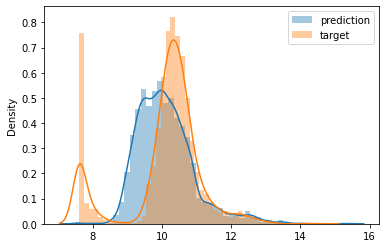

In [42]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='target')
plt.legend() 

# sns.displot(y_pred, label='prediction')
# sns.displot(y_train, label='target')
# plt.legend() 

# sns.histplot(y_pred, label='prediction')
# sns.histplot(y_train, label='target')
# plt.legend() 


We can see from the plot (figure 2.14) that the distribution of values we predicted looks quite
different from the actual values. This result may indicate that the model is not powerful
enough to capture the distribution of the target variable. This shouldn’t be a surprise to us:
the model we used is quite basic and includes only five very simple features. 

**Figure 2.14 The distribution of the predicted values (light gray) and the actual values (dark gray). We see that
our predictions aren’t quite good; they are very different from the actual distribution.**

### 2.4.2 RMSE: evaluating model quality


Looking at plots and comparing the distributions of the actual target variable with the
predictions is a good way to evaluate quality, but we cannot do this every time we change
something in the model. Instead, we need to use a metric that quantifies the quality of the
model. We can use many metrics to evaluate how well a regression model behaves. The most
commonly used one is root mean squared error — RMSE for short.


RMSE tells us how large are the errors that our model makes. It’s computed with the
following formula:

Let’s try to understand what’s going on here. First, let’s look inside the sum. We have 


This is the difference between 𝑔(𝑥𝑖) — the prediction we make for the observation 𝑥𝑖 — and the
actual target value 𝑦𝑖 for that observation (figure 2.15). 

**Figure 2.15 The difference between the predictions g(xi) and the actual values yi.**

Then we use the square of the difference, which gives a lot more weight to larger differences.
If we predict 9.5, for example, and the actual value is 9.6, the difference is 0.1, so its square
is 0.01, which is quite small. But if we predict 7.3, and the actual value is 10.3, the difference
is 3, and the square of the difference is 9 (figure 2.16). 

**Figure 2.16 The square of the difference between the predictions and the actual values. For large differences,
the square is quite big.**

This is the SE part (squared error) of RMSE.
Next, we have a sum: 

This summation goes over all m observations and puts all the squared errors together (figure
2.17) into a single number. 

**Figure 2.17 The result of the summation of all the square differences is a single number.**

If we divide this sum by 𝑚, we get the mean squared error: 

This is the squared error that our model makes on average — the M part (mean) of RMSE, or
mean squared error (MSE). MSE is also a good metric on its own (figure 2.18). 


Figure 2.18 MSE is computed by calculating the mean of the squared errors.

Finally, we take the square root of that: 

This is the R part (root) of RMSE (figure 2.19). 

**Figure 2.19 RMSE: we first compute MSE and then calculate its square root.**

When using NumPy to implement RMSE, we can take advantage of vectorization: the process
of applying the same operation to all elements of one or more NumPy arrays. We get multiple
benefits from using vectorization. First, the code is more concise: we don’t have to write any
loops to apply the same operation to each element of the array. Second, vectorized operations
are a lot faster than simple Python for loops.
Consider the following implementation:

In [43]:
def rmse(y, y_pred):
    error = y_pred - y # A
    mse = (error ** 2).mean() # B
    return np.sqrt(mse) # C

In A, we compute elementwise difference between the vector with predictions and the vector
with the target variable. The result is a new NumPy array error that contains the differences.
In B, we do two operations in one line: compute the square of each element of the error
array and then get the mean value of the result, which gives us MSE. In C, we compute the
square root to get RMSE.


Elementwise operations in NumPy and Pandas are quite convenient. We can apply an
operation to an entire NumPy array (or a Pandas series) without writing loops.


In the first line of our rmse function, for example, we compute the difference between the
predictions and the actual prices: 

What happens here is that for each element of y_pred, we subtract the corresponding element
of y and then put the result to the new array error (figure 2.20). 

**Figure 2.20 The elementwise difference between y_pred and y. The result is written to the error array.**

Next, we compute the square of each element of the error array and then calculate its mean
to get the mean squared error of our model (figure 2.21).

**Figure 2.21 To calculate MSE, we first compute the square of each element in the error array and then compute
the mean value of the result.**

To see what exactly happens, we need to know that the power operator (**) is also applied
elementwise, so the result is another array in which all elements of the original array are
squared. When we have this new array with squared elements, we simply compute its mean
by using the mean() method (figure 2.22). 

**Figure 2.22 The power operator (\**) applied elementwise to the error array. The result is another array in which
each element is squared. Then we compute the mean of the array with the squared error to compute MSE.**]

Finally, we compute the square root of the mean value to get RMSE: 

Now we can use RMSE to evaluate the quality of the model:

In [43]:
rmse(y_train, y_pred) 

0.7554192603920132

The code prints 0.75.

This number tells us that on average, the model’s predictions are off by 0.75. This result
alone may not be very useful, but we can use it to compare this model with other models. If
one model has a better (lower) RMSE than the other, it indicates that this model is better. 

## 2.4.3 Validating the model


In the example from the previous section we computed RMSE on the training set. The result is
useful to know but doesn’t reflect the way the model will be used later. The model will be used
to predict the price of cars that it didn’t see before. For that purpose, we set aside a validation
dataset. We intentionally don’t use it for training and keep it for validating the model.


We have already split our data into multiple parts: df_train, df_val, and df_test. We
have also created a matrix X_train from df_train and used X_train and y_train to train
the model. Now we need to do the same steps to get X_val — a matrix with features
computed from the validation dataset. Then we can apply the model to X_val to get
predictions and compare them with y_val.


First, we create the X_val matrix, following the same steps as for X_train:

In [44]:
df_num = df_val[base] 
df_num.isnull().sum()

engine_hp           16
engine_cylinders     7
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [45]:
df_num = df_num.fillna(0)
df_num.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [46]:
X_val = df_num.values 
X_val

array([[2.000e+02, 4.000e+00, 2.500e+01, 1.900e+01, 1.385e+03],
       [2.410e+02, 4.000e+00, 2.900e+01, 2.200e+01, 6.170e+02],
       [1.600e+02, 4.000e+00, 3.600e+01, 2.600e+01, 5.657e+03],
       ...,
       [3.320e+02, 8.000e+00, 2.300e+01, 2.000e+01, 1.624e+03],
       [1.480e+02, 4.000e+00, 3.400e+01, 2.400e+01, 4.360e+02],
       [2.900e+02, 6.000e+00, 2.500e+01, 1.800e+01, 1.720e+03]])

We’re ready to apply the model to X_val to get predictions:

In [47]:
y_pred = w_0 + X_val.dot(w) 
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

The y_pred array contains the predictions for the validation dataset. Now we use y_pred and
compare it with the actual prices from y_val, using the RMSE function that we implemented
previously: 

In [48]:
rmse(y_val, y_pred) 

0.7616530991301601

The value this code prints is 0.76, which is the number we should use for comparing models.
In the code above we already see some duplication: Training and validation tests require
the same preprocessing, and we wrote the same code twice. Thus, it makes sense to move
this logic to a separate function and avoid duplicating the code.

We can call this function prepare_X because it creates a matrix X from a dataframe. 

In [49]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X 

Now the whole training and evaluation becomes simpler and looks like this:m

In [50]:
# train the model
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

# apply the model to the validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# compute RMSE on the validation data
print('validation:', rmse(y_val, y_pred))

validation: 0.7616530991301601


This gives us a way to check whether any model adjustments lead to improvements in the
predictive quality of the model. As the next step, let’s add more features and check whether it
gets lower RMSE scores. 

## 2.4.4 Simple feature engineering

We already have a simple baseline model with simple features. To improve our model further,
we can add more features to the model: we create others and add them to the existing
features. As we already know, this process is called feature engineering.
Because we have already set up the validation framework, we can easily verify whether
adding new features improves the quality of the model. Our aim is to improve the RMSE
calculated on the validation data.


First, we create a new feature, “age,” from the feature “year.” Age of a car should be very
helpful when predicting its price: intuitively, the newer the car, the more expensive it should
be.


Because the dataset was created in 2017 (which we can verify by checking
df_train.year.max()), we can calculate the age by subtracting the year when the car was
out from 2017:

In [51]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [52]:
df_train['age'] = 2017 - df_train.year
print(df_train.columns)
df_train.head()

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'age'],
      dtype='object')


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,9
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,5
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,26
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0


This operation is an elementwise operation. We calculate the difference between 2017 and
each element of the year series. The result is a new Pandas series containing the differences,
which we write back to the dataframe as the age column.


We already know that we will need to apply the same preprocessing twice: to the training
and validation sets. Because we don’t want to repeat the feature extraction code multiple
times, let’s put this logic into the prepare_X function: 

In [53]:
def prepare_X(df):
    # create a copy of the input parameter to prevent side effects
    df = df.copy()
    
    # create a copy of the base list with the basic features
    features = base.copy()
    
    # compute the age feature
    df['age'] = 2017 - df.year
    
    # append age to the list of feature names we use for the model
    features.append('age')
    
    # declare a variable named, df_num. set the value to the base columns of df dataframe.
    df_num = df[features]
    
    # replace Nan with zeros
    df_num = df_num.fillna(0)
    
    # declare a variable named, X. set the value to df_num.values.
    X = df_num.values
    
    # return X
    return X 

The way we implement the function this time is slightly different from the previous version.
Let’s look at these differences. First, in A, we create a copy of the dataframe df that we pass
in the function. Later in the code, we modify df by adding extra rows in C. This kind ofbehavior is known as a side effect: the caller of the function may not expect the function to
change the dataframe. To prevent the unpleasant the list with the base features for the same
reason. Later, we extend this list with new features D, but we don’t want to change the
original list. The rest of the code is the same as previously.

Let’s test if adding the feature “age” leads to any improvements:

In [54]:
#  prepare the training data.
X_train = prepare_X(df_train)

#  train the model using the training data.
w_0, w = linear_regression(X_train, y_train)

# prepare the validation data.
X_val = prepare_X(df_val)

# apply the model to the validation dataset.
y_pred = w_0 + X_val.dot(w)

# print the rmse
print('validation:', rmse(y_val, y_pred)) 

validation: 0.5172055461058335


The validation error is 0.517, which is a good improvement from 0.76 — the value we had in
the baseline solution. Thus, we conclude that adding “age” is indeed helpful when making
predictions.


We can also look at the distribution of the predicted values:

C:\Users\bizof\Anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bizof\Anaconda3\envs\pyvizenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


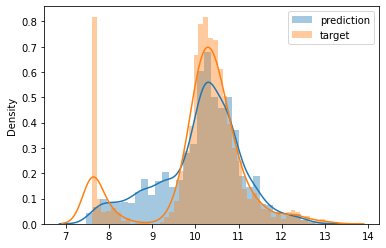

In [55]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='target')
plt.legend() 

# sns.displot(y_pred, label='prediction')
# sns.displot(y_val, label='target')
# plt.legend() 

# sns.histplot(y_pred, label='prediction')
# sns.histplot(y_val, label='target')
# plt.legend() 

## 2.4.5 Handling categorical variables


We see that adding “age” is quite helpful for the model.


Let’s continue adding more features. One of the columns we can use next is the number of
doors. This variable appears to be numeric and can take three values: 2, 3, and 4 doors. Even
though it’s tempting to put the variable to the model as is, it’s not really a numeric variable:
we cannot say that by adding one more door, the price of a car grows (or drops) by a certain
amount of money. Rather, the variable is categorical.


**Categorical variables describe characteristics of objects and can take one of a few possible
values.** The make of a car is a categorical variable, for example; it can be Toyota, BWM, Ford,
or any other make. It’s easy to recognize a categorical variable by its values, which typically
are strings and not numbers. That’s not always the case, however. The number of doors, for
example, is categorical: it can take only one of the three possible values (2, 3, and 4).
We can use categorical variables in a machine learning model in multiple ways. One of the
simplest ways is to encode such variables by a set of binary features, with a separate feature
for each distinct value.


In our case, we will create three binary features: num_doors_2, num_doors_3, and
num_doors_4. If the car has two doors, num_doors_2 will be set to 1, and the rest will be 0. If
the car has three doors, num_doors_3 will get the value 1, and the same goes for
num_doors_4. 

This method of encoding categorical variables is called **one-hot encoding**. We will learn
more about this way of encoding categorical variables in chapter 3. For now, let’s choose the simplest way to do this encoding: looping over the possible values (2, 3, and 4) and, for each value, checking whether the value of the observation matches it.
Let’s add these lines to the prepare_X function: 

This code may be difficult to understand, so let’s take a closer look at what’s going on here.
The most difficult line is C:

Two things happen here. The first one is the expression inside the parentheses, where we use the equals (==) operator. This operation is also an elementwise operation, like the ones we used previously when computing RMSE. In this case, the operation creates a new Pandas series. If elements of the original series equal v, the corresponding elements in the result is True; the elements are False otherwise. The operation creates a series of True/False values. Because v has three values (2, 3, and 4), and we apply this operation to every value of v.

Next, we convert the Boolean series to integers in such a way that True becomes 1 and False
becomes 0, which is easy to do with the astype(int) method (figure 2.25). Now we can use
the results as features and put them into linear regression.

The number of doors, as we discussed, is a categorical variable that appears to be numerical
because the values are integers (2, 3 and 4). All the remaining categorical variables we have
in the dataset are strings.
We can use the same approach to encode other categorical variables. Let’s start with
make. For our purposes, it should be enough to get and use only the most frequently
occurring values. Let’s find out what the five most frequent values are:

In [56]:
df['make'].value_counts().head(5) 

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

We take these values and use them to encode make in the same way that we encoded the number of doors. We create five new variables called is_make_chevrolet, is_make_ford, is_make_volkswagen, is_make_toyota, and is_make_dodge: 

Now the whole prepare_X should look like the following:

In [57]:
def prepare_X(df):
    # create a copy of the input parameter to prevent side effects
    df = df.copy()
    
    # create a copy of the base list with the basic features
    features = base.copy()
    
    # compute the age feature
    df['age'] = 2017 - df.year
    
    # append age to the list of feature names we use for the model
    features.append('age')
    
    # encode the “number of doors” variable
    # Iterate over possible values of the “number of doors” variable
    for v in [2, 3, 4]: # A 
        
        # Give a feature a meaningful name, such as “num_doors_2” for v=2. 
        feature = 'num_doors_%s' % v # B
        
        # Create the one-hot encoding feature. 
        value = (df['number_of_doors'] == v).astype(int) # C
        
        # Add the feature back to the dataframe, using the name from B
        df[feature] = value #D 
        features.append(feature) 
        
    # encode the “make” variable
    # Iterate over possible values of the “make” variable
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        
         # Give a feature a meaningful name, such as 'is_make_toyota' for v='toyota'.
        feature = 'is_make_%s' % v
        
        # Add the feature back to the dataframe, using the feature variable
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    # declare a variable named, df_num. set the value to the base columns of df dataframe.
    df_num = df[features]
    
    # replace Nan with zeros
    df_num = df_num.fillna(0)
    
    # declare a variable named, X. set the value to df_num.values.
    X = df_num.values
    
    # return X
    return X 

Let’s check whether this code improves the RMSE of the model: 

In [58]:
# prepare the training data
X_train = prepare_X(df_train)

# train the model using training data
w_0, w = linear_regression(X_train, y_train)
w

array([ 3.45701060e-03,  9.17408538e-02, -6.18372418e-03,  1.23571673e-02,
       -2.89616609e-05, -9.51811382e-02, -1.25096146e+00, -1.46396979e+00,
       -1.29539677e+00, -1.95721851e-01, -7.92361383e-02,  2.88307619e-02,
       -2.87389672e-01, -2.83585754e-01])

In [59]:
# prepare the validation data
X_val = prepare_X(df_val)

# apply the model to the validation dataset.
y_pred = w_0 + X_val.dot(w)

# print the rmse
print('validation:', rmse(y_val, y_pred)) 

validation: 0.5076038849557034


The previous value was 0.517, so we managed to improve the RMSE score further.
We can use a few more variables: “engine_fuel_type”, “transmission_type”,
“driven_wheels”, “market_category”, “vehicle_size”, and “vehicle_style”. Let’s do the same
thing for them. After the modifications, the prepare_X starts looking a bit more complex.

In [60]:
def prepare_X(df):
    # create a copy of the input parameter to prevent side effects
    df = df.copy()
    
    # create a copy of the base list with the basic features
    features = base.copy()
    
    # compute the age feature
    df['age'] = 2017 - df.year
    
    # append age to the list of feature names we use for the model
    features.append('age')
    
    # encode the “number of doors” variable
    # Iterate over possible values of the “number of doors” variable
    for v in [2, 3, 4]: # A 
        
        # Give a feature a meaningful name, such as “num_doors_2” for v=2. 
        feature = 'num_doors_%s' % v # B
        
        # Create the one-hot encoding feature. 
        value = (df['number_of_doors'] == v).astype(int) # C
        
        # Add the feature back to the dataframe, using the name from B
        df[feature] = value #D 
        features.append(feature) 
        
    # encode the “make” variable
    # Iterate over possible values of the “make” variable
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        
        # Give a feature a meaningful name, such as 'is_make_toyota' for v='toyota'.
        feature = 'is_make_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
        
    #
    # encode the “engine_fuel_type” variable
    # Iterate over possible values of the “engine_fuel_type” variable
    for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']: #A
        
        # Give a feature a meaningful name, such as 'is_type_premium_unleaded_required' for v='premium_unleaded_required'.
        feature = 'is_type_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    
    # encode the “transmission_type” variable
    # Iterate over possible values of the “transmission_type” variable
    for v in ['automatic', 'manual', 'automated_manual']: #B
        
        # Give a feature a meaningful name, such as 'is_transmission_manual' for v='manual'.
        feature = 'is_transmission_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    
    # encode the “driven_wheels” variable
    # Iterate over possible values of the “driven_wheels” variable
    for v in ['front_wheel_drive', 'rear_wheel_drive','all_wheel_drive', 'four_wheel_drive']: #C
        
        # Give a feature a meaningful name, such as 'is_driven_wheels_rear_wheel_drive' for v='rear_wheel_drive'.
        feature = 'is_driven_wheels_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    
    # encode the “market_category” variable
    # Iterate over possible values of the “market_category” variable
    for v in ['crossover', 'flex_fuel', 'luxury','luxury,performance', 'hatchback']: #D
        
        # Give a feature a meaningful name, such as 'is_mc_luxury' for v='luxury'.
        feature = 'is_mc_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
    
    # encode the “vehicle_size” variable
    # Iterate over possible values of the “vehicle_size” variable
    for v in ['compact', 'midsize', 'large']: #E
        
        # Give a feature a meaningful name, such as 'is_size_midsize' for v='midsize'.
        feature = 'is_size_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
    
    # encode the “vehicle_style” variable
    # Iterate over possible values of the “vehicle_style” variable
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']: #F
        
        # Give a feature a meaningful name, such as 'is_style_coupe' for v='coupe'.
        feature = 'is_style_%s' % v
        
        # Add the one-hot encoding feature to the dataframe, using the feature variable
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
    
    #
    
    # declare a variable named, df_num. set the value to the base columns of df dataframe.
    df_num = df[features]
    
    # replace Nan with zeros
    df_num = df_num.fillna(0)
    
    # declare a variable named, X. set the value to df_num.values.
    X = df_num.values
    
    # return X
    return X

In [61]:
# prepare the training data
X_train = prepare_X(df_train)

# train the model using training data
w_0, w = linear_regression(X_train, y_train)

# prepare the validation data
X_val = prepare_X(df_val) 

# apply the model to X_val 
y_pred = w_0 + X_val.dot(w) 

# print the rmse
print('validation:', rmse(y_val, y_pred)) 

validation: 830.8920785817741


The number we see is significantly worse than before. We get 34.2, which is a lot more than
the 0.5 we had before.
NOTE: The number you get may be different, depending on the Python version, NumPy version, the versions
of NumPy dependencies, OS, and other factors. But the jump in the validation metric from 0.5 to something
significantly bigger should always alert us.
Instead of helping, the new features made the score a lot worse. Luckily, we have validation to
help us spot this problem. In the next section, we will see why it happens and how to deal
with it.

## 2.4.6 Regularization


We saw that adding new features does not always help, and in our case, it made things a lot
worse. The reason for this behavior is numerical instability. Recall the formula of the normal
equation:


One of the terms in the equation is the inverse of the XTX matrix:
The inversion is the issue in our case. Sometimes, when adding new columns to X, we can
accidentally add a column that is a combination of other columns. For example, if we already
have the mpg in the city feature and decide to add kilometers per liter in the city, the second
feature is the same as the first one but multiplied by a constant.


When this happens, XTX becomes undetermined or singular, which means that it’s not
possible to find an inverse for this matrix. If we try to invert a singular matrix, NumPy will tell
us about that by raising a LinAlgError:

Our code didn’t raise any exceptions, however. It happened because we don’t typically have
columns that are perfect linear combinations of other columns. The real data is often noisy,
with measurement errors (such as recording 1.3 instead of 13 for mpg), rounding errors (such
as storing 0.0999999 instead of 0.1), and many other errors. Technically, such matrices are
not singular, so NumPy doesn’t complain.


For this reason, however, some of the values in the weights become extremely large — a
lot larger than they are supposed to be.


If we look at the values of our w0 and w, we see that this is indeed the case. The bias term
w0 has the value 5788519290303866.0, for example (the value may vary depending on the
machine, OS, and version of NumPy), and a few components of w have extremely large
negative values as well.


In numerical linear algebra, such issues are called numerical instability issues, and they
are typically solved with regularization techniques. The aim of regularization is to make sure
that the inverse exists by forcing the matrix to be invertible. Regularization is an important
concept in machine learning: it means “controlling” — controlling the weights of the model so
that they behave correctly and don’t grow too large, as in our case.

One way to do regularization is to add a small number to each diagonal element of the
matrix. Then we get the following formula for linear regression:


NOTE: Regularized linear regression is often called ridge regression. Many libraries, including scikit-learn, use
ridge to refer to regularized linear regression and linear regression to refer to the unregularized model.


Let’s look at the part that changed: the matrix that we need to invert. This is how it looks:
This formula says that we need I — an identity matrix, which is a matrix with ones on the
main diagonal and zeros everywhere else. We multiply this identity matrix by a number α. This
way, all the ones on the diagonal of I become α. Then we sum αI and XTX, which adds α to all
the diagonal elements of XTX.


This formula can directly translate to NumPy code:

XTX = X_train.T.dot(X_train)

XTX = XTX + 0.01 * np.eye(XTX.shape[0])


The np.eye function creates a two-dimensional NumPy array that is also an identity matrix.
When we multiply by 0.01, the ones on the diagonal become 0.01, so when we add this matrix
to XTX, we add only 0.01 to its main diagonal (figure 2.26). 

Let’s create a new function that uses this idea and implements linear regression with
regularization. 


In [62]:
# Control the amount of regularization by using the parameter r.
def linear_regression_reg(X, y, r=0.0): #A
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    # Add r to the main diagonal of XTX. 
    reg = r * np.eye(XTX.shape[0]) #B
    XTX = XTX + reg #B
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:] 

The function is very similar to linear regression, but a few lines are different. First, there’s an
extra parameter r that controls the amount of regularization — this corresponds to the
number α in the formula that we add to the main diagonal of XTX.


Regularization affects the final solution by making the components of w smaller. We can
see that the more regularization we add, the smaller the weights become.


Let’s check what happens with our weights for different values of r:

In [63]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, -694700695602717184.00, 278.96, 694700695602667008.00
0.001, 7.19, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


We start with 0, which is an unregularized solution, and get very large numbers. Then we try
0.001 and increase it by 10 times on each step: 0.01, 0.1, 1, and 10. We see that the values
that we selected become smaller as r grows.


Now let’s check whether regularization helps with our problem and what RMSE we get after
that. Let’s run it with r=0.001: 

In [64]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred)) 

validation: 0.46022676266043516


This result is an improvement over the previous score: 0.507

NOTE: Sometimes, when adding a new feature causes performance degradation, simply removing this
feature may be enough to solve the problem. Having a validation dataset is important to decide whether to
add regularization, remove the feature, or do both: we use the score on the validation data to choose the best
option. In our particular case we see that adding regularization helps: it improves the score we had previously.


We tried using r=0.001, but we should try other values as well. Let’s run a grid search to
select the best parameter r: 

In [65]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred)) 

 1e-06 0.4602255729429436
0.0001 0.4602254945347706
 0.001 0.46022676266043516
  0.01 0.46023949632611183
   0.1 0.46037006958137333
     1 0.4618298042653896
     5 0.4684079627533808
    10 0.4757248100693528


We see that the best performance is achieved with a smaller r: 
    
We also notice that the performance for values below 0.1 don’t change much except in the
sixth digit, which we shouldn’t consider to be significant.


Let’s take the model with r=0.01 as the final model. Now we can check it against the test
dataset to verify if the model works:

In [66]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949632611183
test: 0.4571813679692604


Because these two numbers are pretty close, we conclude that the model can generalize well
to the new unseen data. 

## Exercise 2.4


Regularization is needed because


a) It can control the weights of the model and not let them grow too large
b) The real-world data is noisy
c) We often have numerical instability problems


## 2.4.7 (Multiple answers are possible)Using the model


As we now have a model, we can start using it for predicting the price of a car.
Suppose that a user posts the following ad on our website: 

In [67]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
} 

ad2 = {    
    'city_mpg': 22,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 4.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 168,
    'highway_mpg': 30,
    'make': 'ford',
    'market_category': 'crossover',
    'model': 'escape',
    'number_of_doors': 4.0,
    'popularity': 5657,
    'transmission_type': 'automatic',
    'vehicle_size': 'compact',
    'vehicle_style': '4dr_suv',
    'year': 2008
}

We’d like to suggest the price for this car. For that, we use our model:

In [68]:
df_test = pd.DataFrame([ad2])
X_test = prepare_X(df_test) 

First, we create a small dataframe with one row. This row contains all the values of the ad
dictionary we created earlier. Next, we convert this dataframe to a matrix.
Now we can apply our model to the matrix to predict the price of this car:

In [69]:
y_pred = w_0 + X_test.dot(w) 

This prediction is not the final price, however; it's the logarithm of the price. To get the actual
price, we need to undo the logarithm and apply the exponent function:

In [70]:
# suggestion = np.expm1(y_pred)

# OR

suggestion = np.exp(y_pred)
suggestion 

array([14131.94986182])

The output is 28,294.13. The real price of this car is $31,120, so our model is not far from the
actual price. 

## 2.5 Next steps


## 2.5.1 Exercises


There are a few other things you can try to make the model better. For example,


* Try more feature engineering. When implementing category encoding, we included only
the top five values for each categorical variable. Including more values during the
encoding process might improve the model. Try doing that, and re-evaluate the quality
of the model in terms of RMSE.


* Write a function for binary encoding. In this chapter we implemented the category
encoding manually: we looked at the top five values, wrote them in a list, and then
looped over the list to create binary features. Doing it this way is cumbersome, which is
why it’s a good idea to write a function that will do this automatically. It should have
multiple arguments: the dataframe, the name of the categorical variable and the
number of most frequent values it should consider. This function should also help us do
the previous exercise.


## 2.5.2 Other projects


There are other projects you can do now:


* Predict the price of a house. You can take the Boston house prices dataset from
https://www.kaggle.com/vikrishnan/boston-house-prices or https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_boston.html


* Check other datasets, such as https://archive.ics.uci.edu/ml/datasets.php?task=reg,
that have numerical target values. For example, we can use the data from the student
performance dataset (http://archive.ics.uci.edu/ml/datasets/Student+Performance) to
train a model for determining the performance of students.


## 2.6 Summary


* Doing simple initial exploratory analysis is important. Among other things, it helps us
find out whether the data has missing values. It’s not possible to train a linear
regression model when there are missing values, so it’s important to check our data
and fill in the missing values if necessary.


* As a part of exploratory data analysis, we need to check the distribution of the target
variable. If the target distribution has a long tail, we need to apply the log
transformation. Without it, we may get inaccurate and misleading predictions from the
linear regression model.


* The train/validation/test split is the best way to check our models. It gives us a way to
measure the performance of the model reliably, and things like numerical instability issues won’t go unnoticed.


* The linear regression model is based on a simple mathematical formula, and
understanding this formula is the key to successful application of the model. Knowing
these details helps us learn how the model works before coding it.


* It’s not difficult to implement linear regression from scratch, using Python and NumPy.
Doing so helps us understand that there's no magic behind machine learning: it’s
simple math translated to code.


* RMSE gives us a way to measure the predictive performance of our model on the
validation set. It lets us confirm that the model is good and helps us compare multiple
models to find the best one.


* Feature engineering is the process of creating new features. Adding new features is
important for improving the performance of a model. While adding new features, we
always need to use the validation set to make sure that our model indeed improves.
Without constant monitoring, we risk getting mediocre or very bad performance.


* Sometimes, we face numerical instability issues that we can solve with regularization.
Having a good way to validate models is crucial for spotting a problem before it’s too
late.


* After the model is trained and validated, we can use it to make predictions, such as
applying it to cars with unknown prices to estimate how much they may cost.
In chapter 3, we will learn how to do classification with machine learning, using logistic
regression to predict customer churn.


## 2.7 Answers to exercises


* Exercise 2.1 B) Values spread far from the head
* Exercise 2.2 A) xi is a feature vector and yi is the logarithm of the price
* Exercise 2.3 B) A vector y with price predictions
* Exercise 2.4 A), B) and C) All three answers are correct 

In [71]:
x = df[df['make'] =='ford']
x = x[x['model'] == 'escape']
x = x[x['year'] == 2015]
x

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4192,ford,escape,2015,premium_unleaded_(recommended),178.0,4.0,automatic,front_wheel_drive,4.0,crossover,compact,4dr_suv,32,23,5657,29735
4193,ford,escape,2015,premium_unleaded_(recommended),178.0,4.0,automatic,front_wheel_drive,4.0,crossover,compact,4dr_suv,32,23,5657,25650
4194,ford,escape,2015,premium_unleaded_(recommended),178.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,30,22,5657,27400
4195,ford,escape,2015,regular_unleaded,168.0,4.0,automatic,front_wheel_drive,4.0,crossover,compact,4dr_suv,31,22,5657,23450
4196,ford,escape,2015,premium_unleaded_(recommended),178.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,30,22,5657,31485
